In [1]:
import numpy as np
import torch, torchvision

In [2]:
trainFolder = 'DevanagariHandwrittenCharacterDataset/Train'
testFolder = 'DevanagariHandwrittenCharacterDataset/Test'

In [3]:
transform = torchvision.transforms.Compose([torchvision.transforms.Grayscale(num_output_channels=1),
                                            torchvision.transforms.ToTensor()])

# load train datasets
train_dataset = torchvision.datasets.ImageFolder(root=trainFolder, transform=transform)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=20, num_workers=0, shuffle=True)

# load test datasets
test_dataset = torchvision.datasets.ImageFolder(root=testFolder, transform=transform)
test_loader = torch.utils.data.DataLoader(train_dataset,batch_size=20,num_workers=0,shuffle=True)

## visualise a batch of training data

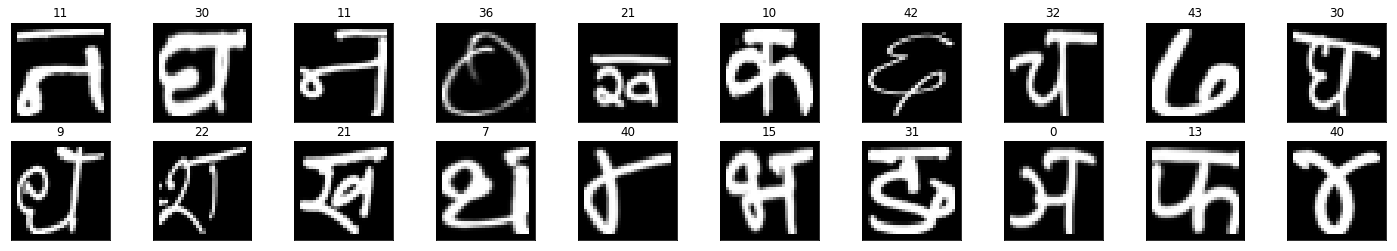

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
    
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    # print out the correct label for each image
    # .item() gets the value contained in a Tensor
    ax.set_title(str(labels[idx].item()))
    

In [5]:
labels

tensor([11, 30, 11, 36, 21, 10, 42, 32, 43, 30,  9, 22, 21,  7, 40, 15, 31,  0,
        13, 40])

In [6]:
train_dataset

Dataset ImageFolder
    Number of datapoints: 78200
    Root location: DevanagariHandwrittenCharacterDataset/Train

## View one image in more detail

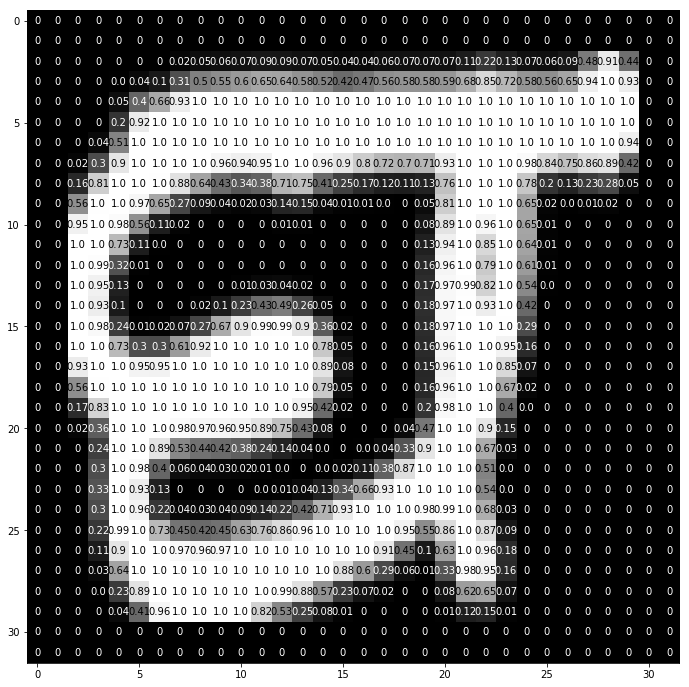

In [7]:
img = np.squeeze(images[1])

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')